In [229]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import holidays

In [230]:
velib = pl.read_csv("C:/Users/pc/Desktop/historique_stations.csv")
velib.head()

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,i64,i64,i64,str,str,bool
"""2020-11-26T12:59Z""",35,4,5,"""Benjamin Godard - Victor Hugo""","""48.86598,2.27572""",true
"""2020-11-26T12:59Z""",55,23,4,"""André Mazet - Saint-André des …","""48.85376,2.33910""",true
"""2020-11-26T12:59Z""",20,0,0,"""Charonne - Robert et Sonia Del…","""48.85591,2.39257""",true
"""2020-11-26T12:59Z""",21,0,1,"""Toudouze - Clauzel""","""48.87930,2.33736""",true
"""2020-11-26T12:59Z""",30,3,1,"""Mairie du 12ème""","""48.84086,2.38755""",true


In [231]:
velib.tail()

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,i64,i64,i64,str,str,bool
"""2021-04-09T14:37Z""",38,4,2,"""Général Michel Bizot - Claude …","""48.83481,2.40093""",true
"""2021-04-09T14:37Z""",20,2,1,"""Ivry - Baudricourt""","""48.82470,2.36311""",true
"""2021-04-09T14:37Z""",39,17,0,"""Saint-Mandé - Docteur Arnold N…","""48.84463,2.40495""",true
"""2021-04-09T14:37Z""",21,12,4,"""Saint-Marcel - Hôpital""","""48.83950,2.36099""",true
"""2021-04-09T14:37Z""",36,12,5,"""Guynemer - Jardin du Luxembour…","""48.84661,2.33255""",true


In [232]:
# statistical summary
velib.describe()

statistic,datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,str,f64,f64,f64,str,str,f64
"""count""","""10986730""",1.098673e7,1.098673e7,1.098673e7,"""10986730""","""10986730""",1.098673e7
"""null_count""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,31.465766,7.845411,3.502016,null,null,0.980206
"""std""",null,12.018012,9.007581,3.144555,null,null,null
"""min""","""2020-11-26T12:59Z""",0.0,0.0,0.0,""" Jean Bleuzen - Square du 11 N…","""48.76462,2.40712""",0.0
"""25%""",null,23.0,1.0,1.0,null,null,null
"""50%""",null,30.0,5.0,3.0,null,null,null
"""75%""",null,37.0,11.0,5.0,null,null,null
"""max""","""2021-04-09T14:37Z""",74.0,73.0,41.0,"""Île de la Jatte""","""48.94702,2.25690""",1.0


In [233]:
# Object for public holidays in France
fr_holidays = holidays.FR()

def is_holiday(d: pl.date) -> bool:
    return d in fr_holidays

In [234]:
def preprocess_velib_data(velib: pl.DataFrame) -> pl.DataFrame:
    """
    Preprocesses Velib bike sharing data by:
    1. Parsing datetime column into date, time and weekday components
    2. Calculating total available bikes and free terminals
    3. Extracting latitude and longitude from station_geo
    
    Args:
        velib (pl.DataFrame): Raw Velib dataframe
        
    Returns:
        pl.DataFrame: Preprocessed Velib dataframe with additional columns
    """
    # parse datetime column and extract date and time
    velib = velib.with_columns(
        # Step 1: Parse the string into a Datetime object
        # Polars' default parser usually handles ISO 8601 format (T separator, Z for UTC)
        datetime = pl.col("datetime").str.to_datetime()
    ).with_columns(
        # Step 2: Extract date features from the new Datetime object
        date = pl.col("datetime").dt.date(),
        is_holiday = pl.col("datetime").is_in(fr_holidays),
        weekday = pl.col("datetime").dt.weekday(),
        week_of_year = pl.col("datetime").dt.week(),
        time = pl.col("datetime").dt.time()
    )

    # create new columns
    total_available = pl.col("available_mechanical") + pl.col("available_electrical")

    velib = velib.with_columns(
        total_available = total_available,
        free_terminals = pl.col("capacity") - total_available,
    )
    
    return velib

velib = preprocess_velib_data(velib)
velib.sample(10)

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative,date,is_holiday,weekday,week_of_year,time,total_available,free_terminals
"datetime[μs, UTC]",i64,i64,i64,str,str,bool,date,bool,i8,i8,time,i64,i64
2021-04-04 05:42:00 UTC,22,0,0,"""Georges V - François 1er""","""48.87034,2.30082""",true,2021-04-04,false,7,13,05:42:00,0,22
2021-02-14 03:52:00 UTC,20,3,2,"""Gare du Stade""","""48.93127,2.26038""",true,2021-02-14,false,7,6,03:52:00,5,15
2020-12-05 20:07:00 UTC,30,17,1,"""Rome - Provence""","""48.87423,2.32557""",true,2020-12-05,false,6,49,20:07:00,18,12
2021-04-05 04:25:00 UTC,25,11,2,"""Square des Saint-Simoniens""","""48.87018,2.39673""",true,2021-04-05,false,1,14,04:25:00,13,12
2021-04-02 02:02:00 UTC,14,4,1,"""Gare de Clamart""","""48.81384,2.27228""",true,2021-04-02,false,5,13,02:02:00,5,9
2021-03-18 16:00:00 UTC,41,31,3,"""Mairie d'Issy""","""48.82377,2.27231""",true,2021-03-18,false,4,11,16:00:00,34,7
2021-03-26 04:27:00 UTC,31,0,2,"""Waldeck Rochet - Germaine Till…","""48.91106,2.36763""",true,2021-03-26,false,5,12,04:27:00,2,29
2020-12-04 18:30:00 UTC,47,5,4,"""Place de la Nation - Taillebou…","""48.84884,2.39730""",true,2020-12-04,false,5,49,18:30:00,9,38
2020-11-29 12:33:00 UTC,27,1,1,"""Voltaire - Anatole France""","""48.89200,2.28426""",true,2020-11-29,false,7,48,12:33:00,2,25


In [235]:
print(velib.filter(pl.col("is_holiday")==True))

shape: (0, 14)
┌────────────┬──────────┬────────────┬────────────┬───┬────────────┬──────┬────────────┬───────────┐
│ datetime   ┆ capacity ┆ available_ ┆ available_ ┆ … ┆ week_of_ye ┆ time ┆ total_avai ┆ free_term │
│ ---        ┆ ---      ┆ mechanical ┆ electrical ┆   ┆ ar         ┆ ---  ┆ lable      ┆ inals     │
│ datetime[μ ┆ i64      ┆ ---        ┆ ---        ┆   ┆ ---        ┆ time ┆ ---        ┆ ---       │
│ s, UTC]    ┆          ┆ i64        ┆ i64        ┆   ┆ i8         ┆      ┆ i64        ┆ i64       │
╞════════════╪══════════╪════════════╪════════════╪═══╪════════════╪══════╪════════════╪═══════════╡
└────────────┴──────────┴────────────┴────────────┴───┴────────────┴──────┴────────────┴───────────┘


In [236]:
# Extract hour from time column
velib = velib.with_columns(
    hour = pl.col("time").cast(str).str.slice(0, 2).cast(pl.Int32)
)

# Group by date, hour, and station, taking last value in each hour
velib = velib.group_by(["date", "hour", "station_name"]).agg([
    pl.col("weekday").last(),
    pl.col("week_of_year").last(),
    pl.col("is_holiday").last(),
    pl.col("total_available").last(),
    pl.col("available_mechanical").last(), 
    pl.col("available_electrical").last(),
    pl.col("free_terminals").last()
])

In [237]:
# drop datetime column and reorder columns
new_velib = velib.select([
    "date",
    "is_holiday",
    "week_of_year",
    "weekday",
    "hour",
    "station_name",
    "total_available",
    "available_mechanical",
    "available_electrical",
    "free_terminals"
]).sort(["date", "hour", "station_name"])

new_velib.sample(10)

date,is_holiday,week_of_year,weekday,hour,station_name,total_available,available_mechanical,available_electrical,free_terminals
date,bool,i8,i8,i32,str,i64,i64,i64,i64
2021-04-09,false,14,5,2,"""Charonne - Alexandre Dumas""",1,1,0,34
2020-12-02,false,49,3,22,"""Liberté - Vert-de-Maisons""",9,6,3,11
2021-01-24,false,3,7,23,"""Flandre - Ourcq""",14,6,8,16
2021-02-27,false,8,6,13,"""Jean Jaurès - Reine""",2,1,1,29
2021-03-05,false,9,5,15,"""Ouest - Château """,2,0,2,21
2020-12-24,false,52,4,3,"""Sabot - Rennes""",5,3,2,21
2021-03-05,false,9,5,2,"""Place Eustache Deschamps""",15,10,5,5
2020-12-19,false,51,6,10,"""Mairie du 14ème""",9,2,7,23
2020-12-01,false,49,2,7,"""Auguste Blanqui - Glacière""",12,4,8,48


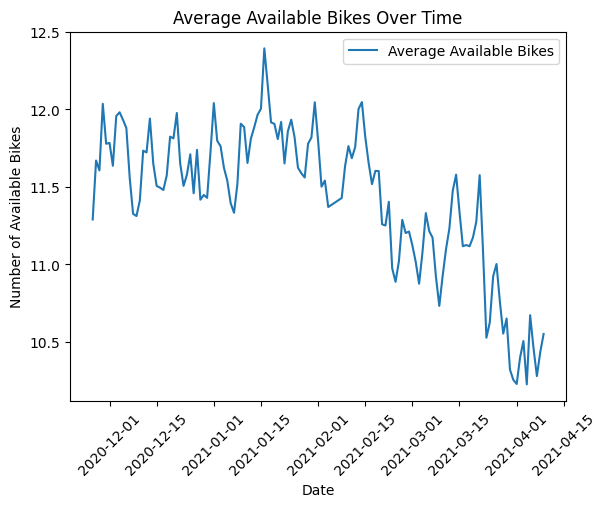

In [238]:
# Group by date and calculate mean total_available across all stations
daily_avg = velib.group_by("date").agg(avg_available=pl.col("total_available").mean()).sort("date")

plt.plot(daily_avg["date"], daily_avg["avg_available"], label='Average Available Bikes')
plt.xlabel('Date')
plt.ylabel('Number of Available Bikes')
plt.title('Average Available Bikes Over Time')
plt.xticks(rotation=45)
plt.legend()

In [239]:
# Create a mapping of unique station names to IDs
station_mapping = (
    velib.sort("station_name")
    .select("station_name")
    .unique()
    .with_row_index("station_id")
)

# Add station IDs to original dataframe by joining on station_name
new_df = velib.join(
    station_mapping,
    on="station_name",
    how="left"
)


In [240]:
# Create a mapping of unique station names to IDs
station_mapping = (
    velib.sort("station_name")
    .select("station_name")
    .unique()
    .with_row_index("station_id")
)

# Add station IDs to original dataframe by joining on station_name
new_df = velib.join(
    station_mapping,
    on="station_name",
    how="left"
)

new_df = new_df.with_columns(
    pl.col("station_id").cast(pl.String).cast(pl.Categorical)
)

# Replace station_name with station_id and reorder columns
new_df = new_df.select([
    "date",
    "is_holiday",
    "week_of_year",
    "weekday",
    "hour", 
    "station_id",
    "total_available",
    "available_mechanical", 
    "available_electrical",
    "free_terminals"
])

print("Station ID Mapping:")
print(station_mapping.head())
print("\nUpdated Velib Data:")
new_df.head()

Station ID Mapping:
shape: (5, 2)
┌────────────┬─────────────────────────────────┐
│ station_id ┆ station_name                    │
│ ---        ┆ ---                             │
│ u32        ┆ str                             │
╞════════════╪═════════════════════════════════╡
│ 0          ┆  Jean Bleuzen - Square du 11 N… │
│ 1          ┆  Place Léon Gambetta            │
│ 2          ┆ 11 Novembre 1918 - 8 Mai 1945   │
│ 3          ┆ 18 juin 1940 - Buzenval         │
│ 4          ┆ 8 Mai 1945 - 10 Juillet 1940    │
└────────────┴─────────────────────────────────┘

Updated Velib Data:


date,is_holiday,week_of_year,weekday,hour,station_id,total_available,available_mechanical,available_electrical,free_terminals
date,bool,i8,i8,i32,cat,i64,i64,i64,i64
2020-12-22,false,52,2,19,"""321""",12,4,8,10
2020-12-12,false,50,6,15,"""858""",1,0,1,23
2020-12-08,false,50,2,15,"""1274""",31,27,4,3
2021-01-10,false,1,7,4,"""435""",11,4,7,9
2021-03-19,false,11,5,14,"""146""",28,25,3,5


In [241]:
# Sort by station_id, date and hour to ensure proper lag calculation
df_sorted = new_df.sort(["station_id", "date", "hour"])

# Get unique station IDs
unique_stations = df_sorted.get_column("station_id").unique().to_list()

# Create list to store DataFrames with lagged features for each station
station_lag_dfs = []

# For each station, create lagged features
for station_id in unique_stations:
    # Filter data for current station
    station_df = df_sorted.filter(pl.col("station_id") == station_id)
    
    # Create lag columns for total_available
    lag_columns = []
    for i in range(1, 25):
        lag_columns.append(
            pl.col("total_available").shift(i).alias(f"total_available_lag_{i}h")
        )
    
    # Add lag columns to station DataFrame
    station_with_lags = station_df.with_columns(lag_columns).select(
        ["station_id", "date", "week_of_year", "weekday", "hour", "total_available"] + 
        [f"total_available_lag_{i}h" for i in range(1, 25)]
    )
    
    # Drop rows with any null values (first 24 hours)
    station_with_lags = station_with_lags.drop_nulls()
    
    if len(station_with_lags) > 0:  # Only append if we have data after dropping nulls
        station_lag_dfs.append(station_with_lags)


In [242]:
idx = np.random.randint(0, len(station_lag_dfs))
print(f"Created lag features for {len(station_lag_dfs)} stations")
print(f"\nExample of lagged features for station {idx}:")
print(f"Shape of the station's DataFrame: {station_lag_dfs[idx].shape}")
station_lag_dfs[idx].head(10)

Created lag features for 1396 stations

Example of lagged features for station 992:
Shape of the station's DataFrame: (3056, 30)


station_id,date,week_of_year,weekday,hour,total_available,total_available_lag_1h,total_available_lag_2h,total_available_lag_3h,total_available_lag_4h,total_available_lag_5h,total_available_lag_6h,total_available_lag_7h,total_available_lag_8h,total_available_lag_9h,total_available_lag_10h,total_available_lag_11h,total_available_lag_12h,total_available_lag_13h,total_available_lag_14h,total_available_lag_15h,total_available_lag_16h,total_available_lag_17h,total_available_lag_18h,total_available_lag_19h,total_available_lag_20h,total_available_lag_21h,total_available_lag_22h,total_available_lag_23h,total_available_lag_24h
cat,date,i8,i8,i32,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""537""",2020-11-27,48,5,12,1,2,7,11,10,0,0,0,1,0,0,0,0,0,2,1,1,0,5,7,10,3,8,8,9
"""537""",2020-11-27,48,5,13,4,1,2,7,11,10,0,0,0,1,0,0,0,0,0,2,1,1,0,5,7,10,3,8,8
"""537""",2020-11-27,48,5,14,0,4,1,2,7,11,10,0,0,0,1,0,0,0,0,0,2,1,1,0,5,7,10,3,8
"""537""",2020-11-27,48,5,15,8,0,4,1,2,7,11,10,0,0,0,1,0,0,0,0,0,2,1,1,0,5,7,10,3
"""537""",2020-11-27,48,5,16,8,8,0,4,1,2,7,11,10,0,0,0,1,0,0,0,0,0,2,1,1,0,5,7,10
"""537""",2020-11-27,48,5,17,2,8,8,0,4,1,2,7,11,10,0,0,0,1,0,0,0,0,0,2,1,1,0,5,7
"""537""",2020-11-27,48,5,18,3,2,8,8,0,4,1,2,7,11,10,0,0,0,1,0,0,0,0,0,2,1,1,0,5
"""537""",2020-11-27,48,5,19,2,3,2,8,8,0,4,1,2,7,11,10,0,0,0,1,0,0,0,0,0,2,1,1,0
"""537""",2020-11-27,48,5,20,1,2,3,2,8,8,0,4,1,2,7,11,10,0,0,0,1,0,0,0,0,0,2,1,1


In [243]:
# Concatenate all station DataFrames vertically
combined_df = pl.concat(station_lag_dfs)
combined_df = combined_df.sort(["station_id", "date", "hour"])

print(f"Shape of combined DataFrame: {combined_df.shape}")
print("\nFirst few rows of combined DataFrame:")
combined_df.head(10)

Shape of combined DataFrame: (4256136, 30)

First few rows of combined DataFrame:


station_id,date,week_of_year,weekday,hour,total_available,total_available_lag_1h,total_available_lag_2h,total_available_lag_3h,total_available_lag_4h,total_available_lag_5h,total_available_lag_6h,total_available_lag_7h,total_available_lag_8h,total_available_lag_9h,total_available_lag_10h,total_available_lag_11h,total_available_lag_12h,total_available_lag_13h,total_available_lag_14h,total_available_lag_15h,total_available_lag_16h,total_available_lag_17h,total_available_lag_18h,total_available_lag_19h,total_available_lag_20h,total_available_lag_21h,total_available_lag_22h,total_available_lag_23h,total_available_lag_24h
cat,date,i8,i8,i32,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""321""",2020-11-27,48,5,12,1,2,4,1,1,2,9,19,20,20,20,18,18,18,19,18,20,16,10,6,3,3,1,3,4
"""321""",2020-11-27,48,5,13,2,1,2,4,1,1,2,9,19,20,20,20,18,18,18,19,18,20,16,10,6,3,3,1,3
"""321""",2020-11-27,48,5,14,2,2,1,2,4,1,1,2,9,19,20,20,20,18,18,18,19,18,20,16,10,6,3,3,1
"""321""",2020-11-27,48,5,15,3,2,2,1,2,4,1,1,2,9,19,20,20,20,18,18,18,19,18,20,16,10,6,3,3
"""321""",2020-11-27,48,5,16,10,3,2,2,1,2,4,1,1,2,9,19,20,20,20,18,18,18,19,18,20,16,10,6,3
"""321""",2020-11-27,48,5,17,12,10,3,2,2,1,2,4,1,1,2,9,19,20,20,20,18,18,18,19,18,20,16,10,6
"""321""",2020-11-27,48,5,18,11,12,10,3,2,2,1,2,4,1,1,2,9,19,20,20,20,18,18,18,19,18,20,16,10
"""321""",2020-11-27,48,5,19,8,11,12,10,3,2,2,1,2,4,1,1,2,9,19,20,20,20,18,18,18,19,18,20,16
"""321""",2020-11-27,48,5,20,12,8,11,12,10,3,2,2,1,2,4,1,1,2,9,19,20,20,20,18,18,18,19,18,20


In [ ]:
# *** Convert to Pandas before splitting and training ***
combined_df_pd = combined_df.to_pandas()
# use_pyarrow_extension_array=True could be more efficient and preserves nullable types better

# Now proceed with the Pandas DataFrame as before:
# Verify the dtype in Pandas (should be 'category')
# print(combined_df_pd.dtypes)

if 'station_id' in combined_df_pd.columns:
     print(f"Polars 'station_id' dtype: {combined_df['station_id'].dtype}") # Should be 'category
     print(f"Pandas 'station_id' dtype: {combined_df_pd['station_id'].dtype}") # Should be 'category'

Polars 'station_id' dtype: Categorical(ordering='physical')
Pandas 'station_id' dtype: category


In [245]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit

In [246]:
X = combined_df_pd.drop(['date', 'total_available'], axis=1)
y = combined_df_pd["total_available"]
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (4256136, 28)
y shape: (4256136,)


In [247]:
# Define the split point (e.g., 80% for training)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

# Split the data temporally
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3404908, 28), y_train shape: (3404908,)
X_test shape: (851228, 28), y_test shape: (851228,)


In [248]:
# Create LightGBM Dataset objects
# It automatically detects 'category' dtype columns
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False) # Keep raw data if needed later
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data=False)

# Define parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'random_state': 42,
    'verbose': -1 # Suppress verbose logging chatter
    # Add other parameters
}

# Train the model
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000, # Max rounds
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['train', 'eval'],
                callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

# Predict
predictions = gbm.predict(X_test, num_iteration=gbm.best_iteration)

Training until validation scores don't improve for 10 rounds
[50]	train's rmse: 2.57088	eval's rmse: 2.43577
[100]	train's rmse: 2.33725	eval's rmse: 2.28351
[150]	train's rmse: 2.2887	eval's rmse: 2.27018
[200]	train's rmse: 2.26131	eval's rmse: 2.26441
[250]	train's rmse: 2.24067	eval's rmse: 2.26102
[300]	train's rmse: 2.22906	eval's rmse: 2.25813
[350]	train's rmse: 2.21787	eval's rmse: 2.25658
[400]	train's rmse: 2.2095	eval's rmse: 2.25523
Early stopping, best iteration is:
[428]	train's rmse: 2.20535	eval's rmse: 2.25435


In [254]:
import numpy as np

rounded_predictions = np.round(predictions).astype(int)
# Ensure predictions are not negative
final_predictions = np.maximum(0, rounded_predictions)

# Now 'final_predictions' contains non-negative integers
print(final_predictions[:20]) # Print some examples

[4 4 4 4 4 4 5 5 6 6 6 7 7 7 7 7 7 7 7 7]


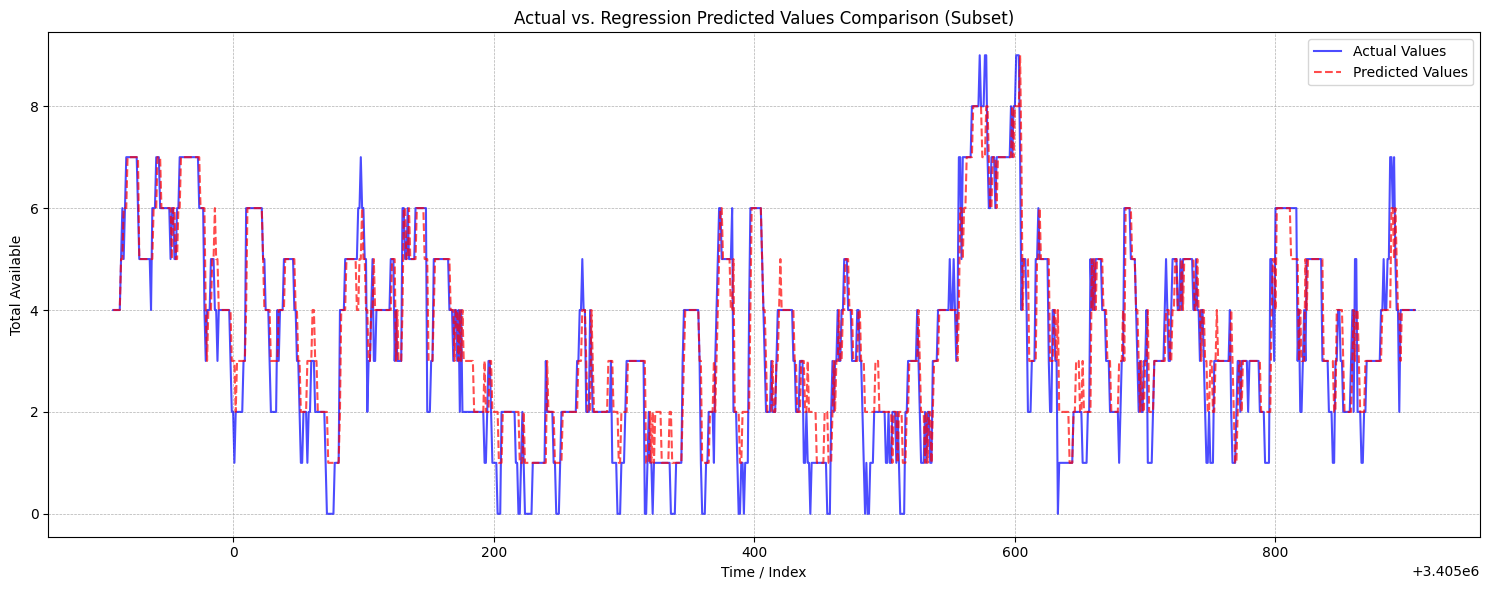

In [259]:
import pandas as pd

plot_subset = True # Set to False to plot all test data
subset_start = 0
subset_end = 1000 # Plot the first 1000 points of the test set

if plot_subset:
    # Check if y_test is a Pandas Series to use .iloc for slicing consistently
    if isinstance(y_test, pd.Series):
        y_test_subset = y_test.iloc[subset_start:subset_end]
        # Use the same index for predictions
        plot_index = y_test_subset.index
        predictions_subset = final_predictions[subset_start:subset_end]
    else: # Assume NumPy array
        y_test_subset = y_test[subset_start:subset_end]
        plot_index = range(subset_start, subset_end) # Simple range for x-axis
        predictions_subset = final_predictions[subset_start:subset_end]
else:
    y_test_subset = y_test
    predictions_subset = final_predictions
    # Determine index for plotting all data
    if isinstance(y_test, pd.Series):
        plot_index = y_test.index
    else:
        plot_index = range(len(y_test))

# --- Create the plot ---
plt.figure(figsize=(15, 6)) # Adjust figure size as needed

plt.plot(plot_index, y_test_subset, label='Actual Values', color='blue', alpha=0.7)
plt.plot(plot_index, predictions_subset, label='Predicted Values', color='red', alpha=0.7, linestyle='--')

# --- Add labels and title ---
plt.title('Actual vs. Regression Predicted Values Comparison' + (' (Subset)' if plot_subset else ''))
plt.xlabel('Time / Index')
plt.ylabel('Total Available')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adjust layout

# --- Show the plot ---
plt.show()

In [256]:
# --- In your parameter definition ---
params_poisson = {
    'objective': 'poisson', # CHANGE HERE
    'metric': 'rmse',       # You can still monitor RMSE, or use 'poisson' (Poisson deviance)
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'random_state': 42,
    'verbose': -1
    # Add other parameters
}

# --- Train using the new parameters ---
# (Assuming lgb_train, lgb_eval are already created as before)
print("\nStarting LightGBM training with Poisson objective...")
gbm_poisson = lgb.train(params_poisson,
                        lgb_train,
                        num_boost_round=1000,
                        valid_sets=[lgb_train, lgb_eval],
                        valid_names=['train', 'eval'],
                        callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

# --- Predict ---
# The output is the expected rate (lambda), which is a non-negative float
poisson_predictions_float = gbm_poisson.predict(X_test, num_iteration=gbm_poisson.best_iteration)

# *** You might STILL round this final rate if a strict integer count is needed ***
final_poisson_predictions = np.round(poisson_predictions_float).astype(int)
# Clamping at 0 might be redundant as Poisson output should be >= 0, but doesn't hurt
final_poisson_predictions = np.maximum(0, final_poisson_predictions)

print(final_poisson_predictions[:20]) # Print some examples


Starting LightGBM training with Poisson objective...
Training until validation scores don't improve for 10 rounds
[50]	train's rmse: 3.82304	eval's rmse: 3.50588
[100]	train's rmse: 2.59707	eval's rmse: 2.45045
[150]	train's rmse: 2.42014	eval's rmse: 2.31351
[200]	train's rmse: 2.37266	eval's rmse: 2.28783
[250]	train's rmse: 2.34765	eval's rmse: 2.27751
[300]	train's rmse: 2.32586	eval's rmse: 2.27141
[350]	train's rmse: 2.30346	eval's rmse: 2.26739
[400]	train's rmse: 2.28842	eval's rmse: 2.26342
[450]	train's rmse: 2.27747	eval's rmse: 2.26068
[500]	train's rmse: 2.26848	eval's rmse: 2.25841
[550]	train's rmse: 2.26058	eval's rmse: 2.25645
[600]	train's rmse: 2.2534	eval's rmse: 2.25486
[650]	train's rmse: 2.24759	eval's rmse: 2.25317
[700]	train's rmse: 2.24294	eval's rmse: 2.25233
[750]	train's rmse: 2.23942	eval's rmse: 2.25104
[800]	train's rmse: 2.23561	eval's rmse: 2.25034
[850]	train's rmse: 2.23102	eval's rmse: 2.24934
[900]	train's rmse: 2.22798	eval's rmse: 2.24852
[950]

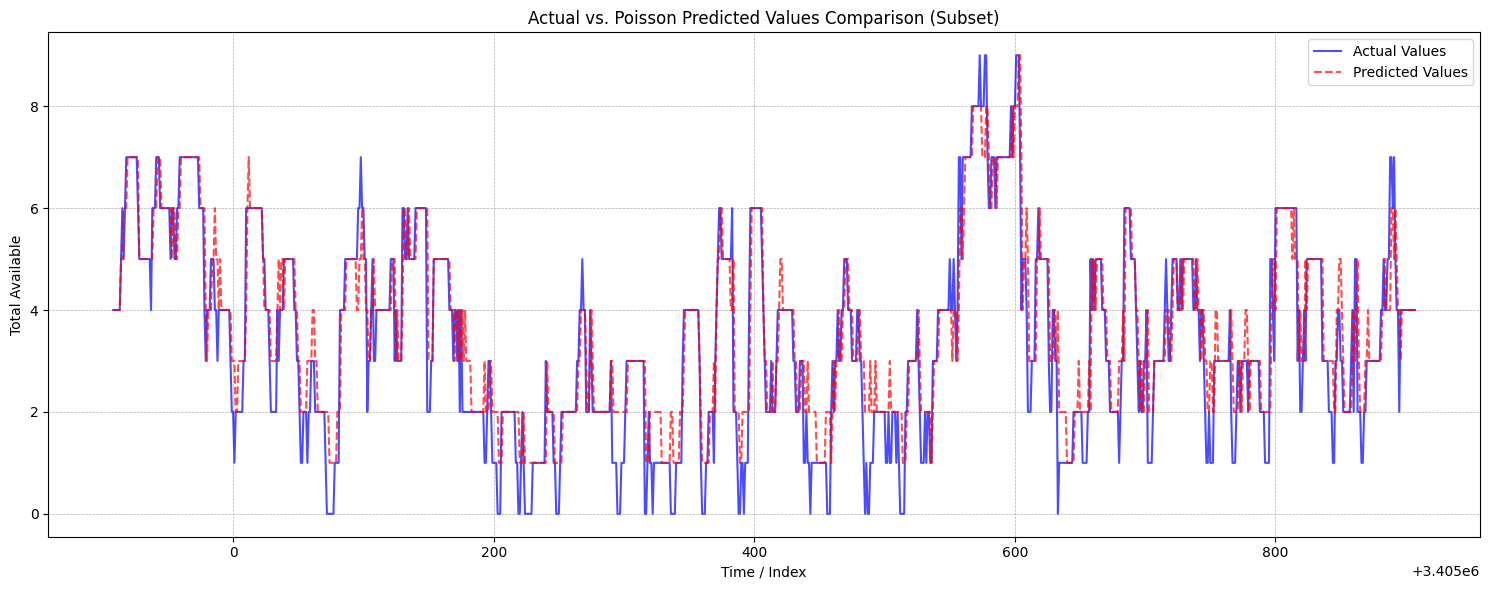

In [258]:
plot_subset = True # Set to False to plot all test data
subset_start = 0
subset_end = 1000 # Plot the first 1000 points of the test set

if plot_subset:
    # Check if y_test is a Pandas Series to use .iloc for slicing consistently
    if isinstance(y_test, pd.Series):
        y_test_subset = y_test.iloc[subset_start:subset_end]
        # Use the same index for predictions
        plot_index = y_test_subset.index
        predictions_subset = final_poisson_predictions[subset_start:subset_end]
    else: # Assume NumPy array
        y_test_subset = y_test[subset_start:subset_end]
        plot_index = range(subset_start, subset_end) # Simple range for x-axis
        predictions_subset = final_poisson_predictions[subset_start:subset_end]
else:
    y_test_subset = y_test
    predictions_subset = final_poisson_predictions
    # Determine index for plotting all data
    if isinstance(y_test, pd.Series):
        plot_index = y_test.index
    else:
        plot_index = range(len(y_test))

# --- Create the plot ---
plt.figure(figsize=(15, 6)) # Adjust figure size as needed

plt.plot(plot_index, y_test_subset, label='Actual Values', color='blue', alpha=0.7)
plt.plot(plot_index, predictions_subset, label='Predicted Values', color='red', alpha=0.7, linestyle='--')

# --- Add labels and title ---
plt.title('Actual vs. Poisson Predicted Values Comparison' + (' (Subset)' if plot_subset else ''))
plt.xlabel('Time / Index')
plt.ylabel('Total Available')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adjust layout

In [268]:
# Create DMatrix objects, enabling categorical support
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Define parameters
# Note: some params like 'num_boost_round' are passed to train()
params = {
    'objective': 'count:poisson', # Or 'binary:logistic', 'multi:softprob'
    'eval_metric': 'rmse',          # Or 'logloss', 'mlogloss'
    'tree_method': 'hist',          # Recommended for categorical features
    'eta': 0.1,                     # Learning rate
    'max_depth': 3,
    'seed': 42
    # Add other hyperparameters
}

# Specify datasets for watching performance during training
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Train the model
num_boost_round = 100 # Equivalent to n_estimators
bst = xgb.train(params,
                dtrain,
                num_boost_round=num_boost_round,
                evals=watchlist,
                # early_stopping_rounds=10, # Optional
                verbose_eval=False # Suppress evaluation output each round
               )

# Predict (use best iteration if early stopping was used)
best_iteration = bst.best_iteration if hasattr(bst, 'best_iteration') else num_boost_round
float_predictions = bst.predict(dtest, iteration_range=(0, best_iteration))

# *** You might STILL round this final rate if a strict integer count is needed ***
final_xgb_poisson_predictions = np.round(float_predictions).astype(int)
# Clamping at 0 might be redundant as Poisson output should be >= 0, but doesn't hurt
final_xgb_poisson_predictions = np.maximum(0, final_xgb_poisson_predictions)

In [273]:
final_xgb_poisson_predictions[1500:1700]

array([11, 11, 11, 10,  8,  5,  4,  3,  3,  2,  2,  3,  4,  7, 10, 11, 12,
       11, 12, 12, 12, 12, 13, 13, 13, 13, 12, 14, 12,  8,  9, 10,  6,  7,
        8,  6,  3,  4,  7,  7,  5,  8, 11, 13, 12, 11, 12, 12, 14, 14, 14,
       13, 12, 10,  7, 12,  7,  7,  6,  6,  3,  5,  5,  8,  9,  9,  9,  7,
       10,  9,  8,  7,  7,  8,  7,  7,  7,  8,  7,  4,  3,  7,  5,  5,  6,
        4,  3,  4,  4,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,
        8,  7,  2,  6,  6,  6,  6,  3,  4,  3,  7, 10,  9,  6,  8,  8,  7,
        7,  7,  7,  6,  7,  4,  4,  3,  2,  2,  4,  6,  5,  2,  6,  8,  4,
        6,  7, 12, 12, 13, 13, 13, 13, 12, 10, 11,  9,  9, 10, 13, 16, 12,
       13, 14, 15, 18, 18, 13, 11, 13, 13, 14, 16, 16, 16, 16, 16, 16, 16,
       16, 12,  9,  9,  9, 10,  7,  7,  6,  3,  5,  6,  3,  4,  8, 12, 10,
       10, 10,  8,  8,  8,  7,  7,  7,  7,  8,  9, 12, 11])

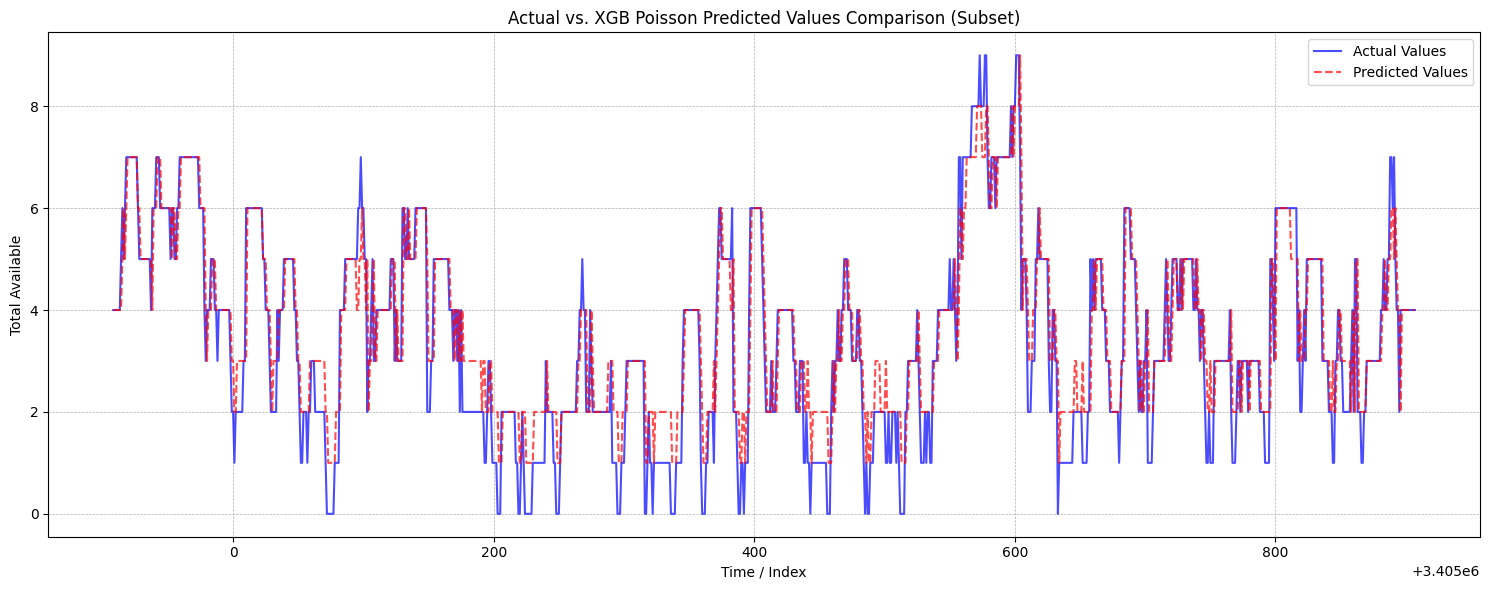

In [274]:
plot_subset = True # Set to False to plot all test data
subset_start = 0
subset_end = 1000 # Plot the first 1000 points of the test set

if plot_subset:
    # Check if y_test is a Pandas Series to use .iloc for slicing consistently
    if isinstance(y_test, pd.Series):
        y_test_subset = y_test.iloc[subset_start:subset_end]
        # Use the same index for predictions
        plot_index = y_test_subset.index
        predictions_subset = final_xgb_poisson_predictions[subset_start:subset_end]
    else: # Assume NumPy array
        y_test_subset = y_test[subset_start:subset_end]
        plot_index = range(subset_start, subset_end) # Simple range for x-axis
        predictions_subset = final_xgb_poisson_predictions[subset_start:subset_end]
else:
    y_test_subset = y_test
    predictions_subset = final_xgb_poisson_predictions
    # Determine index for plotting all data
    if isinstance(y_test, pd.Series):
        plot_index = y_test.index
    else:
        plot_index = range(len(y_test))

# --- Create the plot ---
plt.figure(figsize=(15, 6)) # Adjust figure size as needed

plt.plot(plot_index, y_test_subset, label='Actual Values', color='blue', alpha=0.7)
plt.plot(plot_index, predictions_subset, label='Predicted Values', color='red', alpha=0.7, linestyle='--')

# --- Add labels and title ---
plt.title('Actual vs. XGB Poisson Predicted Values Comparison' + (' (Subset)' if plot_subset else ''))
plt.xlabel('Time / Index')
plt.ylabel('Total Available')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adjust layout

In [306]:
print(f"Mode of labels in training data: {y_train.mode(dropna=True)}")
print(f"total_count of training labels: {len(y_train)}")
print(f"count of 0 in training labels: {len(y_train[y_train==0])}")
print(f"count of 3 in training labels: {len(y_train[y_train==3])}")
print(f"mode of y_train {y_train.mode()}")
print(y_train.value_counts())

Mode of labels in training data: 0    3
Name: total_available, dtype: int64
total_count of training labels: 3404908
count of 0 in training labels: 147754
count of 3 in training labels: 220203
mode of y_train 0    3
Name: total_available, dtype: int64
total_available
3     220203
4     211666
2     207234
5     199818
6     186258
       ...  
69       258
71       193
72        95
73        78
74        59
Name: count, Length: 75, dtype: int64


In [316]:
print(f"frequency of 0 in y_test {(y_test==0).mean():.3%}")
print(f"frequency of 0 in predictions {(final_predictions==0).mean():.3%}")

frequency of 0 in y_test 3.801%
frequency of 0 in predictions 0.781%


In [311]:
# Get float predictions (e.g., from the original regression model or poisson/tweedie)
# predictions_float = gbm.predict(X_test, num_iteration=gbm.best_iteration) # Or gbm_poisson.predict(...)
actual_zeros_mask = (y_test == 0)
predictions_for_actual_zeros = float_predictions[actual_zeros_mask]
print("Predictions when actual was 0:")
print(pd.Series(predictions_for_actual_zeros).describe())
# Are predictions here consistently >= 0.5? Or are they < 0.5 but maybe rounding wasn't applied?

Predictions when actual was 0:
count    32359.000000
mean         1.792488
std          1.064702
min          1.111188
25%          1.309752
50%          1.327861
75%          1.895119
max         30.305176
dtype: float64
